In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [2]:
np.random.seed(0)

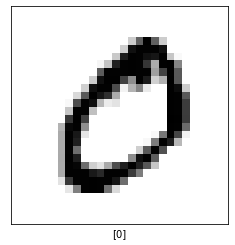

In [3]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [5]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [7]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN 
x_test = x_test.reshape(-1,28, 28, 1)


In [8]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7654 - loss: 0.7128 - val_accuracy: 0.9698 - val_loss: 0.0994
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9549 - loss: 0.1494 - val_accuracy: 0.9790 - val_loss: 0.0672
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9659 - loss: 0.1077 - val_accuracy: 0.9810 - val_loss: 0.0628
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9723 - loss: 0.0888 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9750 - loss: 0.0799 - val_accuracy: 0.9853 - val_loss: 0.0451
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.9872 - val_loss: 0.0426
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9792 - loss: 0.0662 - val_accuracy: 0.9847 - val_loss: 0.0491
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9800 - loss: 0.0621 - 

In [9]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9894000291824341


In [10]:
predictions = model.predict(x_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([1.0121570e-10, 1.7771450e-08, 1.0102375e-07, 4.2989423e-06,
       3.5429833e-11, 1.5869018e-09, 5.6043480e-16, 9.9999428e-01,
       3.6419936e-09, 1.2697620e-06], dtype=float32)

In [11]:
np.argmax(predictions[0])

7

In [12]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

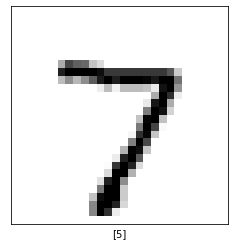

In [13]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


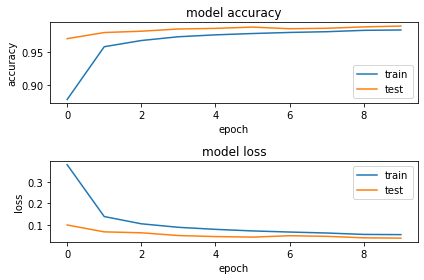

In [15]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

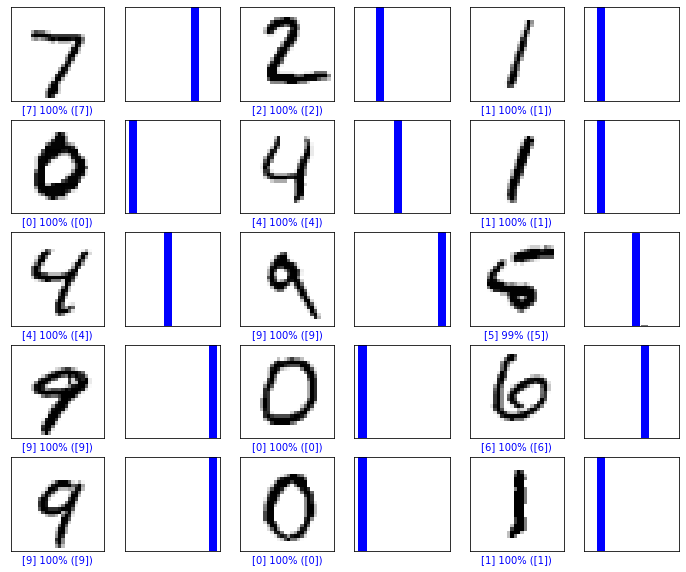

In [17]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()